<a href="https://colab.research.google.com/github/veiro/tesis-imputacion-datos/blob/main/codigo/prediccion/Prueba_de_prediccion_numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar tecnicas de ml para prededir 2 atributos: uno categorico y otro numerico.

Obtener metricas de que tan bien funciona para la prediccion en el dataset - original.

# Trabajo en siguiente iteracion
Luego de hacer imputacion de datos con los algoritmos GAIN y MIDA se obtiene el dataset-GAIN y dataset-MIDA.

Se va a comporar las metricas de prediccion en:
- dataset - original.
- dataset-GAIN
- dataset-MIDA

# Configuracion ambiente

In [ ]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False

In [ ]:
#!pip install ydata-profiling

In [ ]:
!pip install pycaret
#https://pycaret.gitbook.io/docs/get-started/tutorials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 k

In [ ]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive
#from ydata_profiling import ProfileReport

from datetime import datetime


In [ ]:
!python3 -m pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.21.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.0.3
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
category-encoders==2.6.3
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.1

# Preprocesamiento datos

In [ ]:
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
  sys.path.append('/content/gdrive/MyDrive/Maestria/Tesis/Codigo/utils')
  import utils as utils
else:
  PATH_DATA_PROCESADA = "/mnt"


Mounted at /content/gdrive


# Regresion de un atributo numerico

En base a los dato
(**Province_State	Country_Region	Last_Update	Lat	Long_	Confirmed		Incident_Rate	Case_Fatality_Ratio	date**) el objetivo es predecir **Deaths**

-------

basado en el tutorial: https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb#scrollTo=40ed5152&uniqifier=1


In [ ]:
# para hacer pruebas bajo la cantidad
train_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_train_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')
test_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_test_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')

from pycaret.regression import *

if(MODO_DESARROLLO):
  df_train = train_data_decoded_open.sample(n=10000, random_state=1)
  df_test = test_data_decoded_open.sample(n=10000, random_state=1)

else:
  df_train = train_data_decoded_open
  df_test = test_data_decoded_open


utils.mostrarDatos(df_train)
utils.mostrarDatos(df_test)

Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(2094556, 10)

--------------------------------------------------------------------------------

Count of NaN:

0

--------------------------------------------------------------------------------

Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(897667, 10)

-------------------------------------------------------------

In [ ]:
%%time
s = setup(df_train, target = 'Deaths', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Deaths
2,Target type,Regression
3,Original data shape,"(2094556, 10)"
4,Transformed data shape,"(2094556, 34)"
5,Transformed train set shape,"(1466189, 34)"
6,Transformed test set shape,"(628367, 34)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


CPU times: user 24.2 s, sys: 5.73 s, total: 30 s
Wall time: 30.3 s


In [ ]:
print(f'Categorical features: {s._fxs["Categorical"]}')

Categorical features: ['Province_State', 'Country_Region', 'Last_Update', 'date']


## Comprar modelos


In [ ]:
%%time
best = compare_models()

ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'regresion_deaths_Desarrollo='+str(MODO_DESARROLLO)
save_model(best, ruta_modelo)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.9223,4321.2495,52.1140,0.9999,0.0135,0.0027,283.2100
et,Extra Trees Regressor,0.8549,2855.6057,30.3239,0.9999,0.0129,0.0020,147.7080
dt,Decision Tree Regressor,2.4349,4520.0426,54.2303,0.9998,0.0178,0.0028,7.5090
xgboost,Extreme Gradient Boosting,29.5525,24098.2232,152.4836,0.9992,0.3661,0.1510,7.5890
gbr,Gradient Boosting Regressor,107.6681,136594.4057,369.3817,0.9954,1.1213,1.8224,109.8230
knn,K Neighbors Regressor,251.6891,3751628.0240,1936.0688,0.8738,0.7164,0.3717,359.1200
lar,Least Angle Regression,625.0673,7784872.9941,2789.0153,0.7386,2.0734,13.3222,2.2720
br,Bayesian Ridge,625.0796,7784873.0105,2789.0153,0.7386,2.0734,13.3234,3.4000
ridge,Ridge Regression,625.0841,7784873.0192,2789.0153,0.7386,2.0734,13.3238,2.2550
lr,Linear Regression,625.0673,7784872.9941,2789.0153,0.7386,2.0734,13.3222,3.3700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
CPU times: user 41min 29s, sys: 35.9 s, total: 42min 5s
Wall time: 2h 56min 5s


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                              'Incident_Rate',
                                              'Case_Fatality_Ratio'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Province_State', 'Country_Region',
                                              'Last_Update', 'date'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),...
                                                                         {'col': 'date',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': 01-01-2021    0
 01-01-2022    1
 NaN          -1
 dtype: int64}]))),
              

## Resultados entrenamiento

In [ ]:
#plot_model(best, plot = 'residuals')

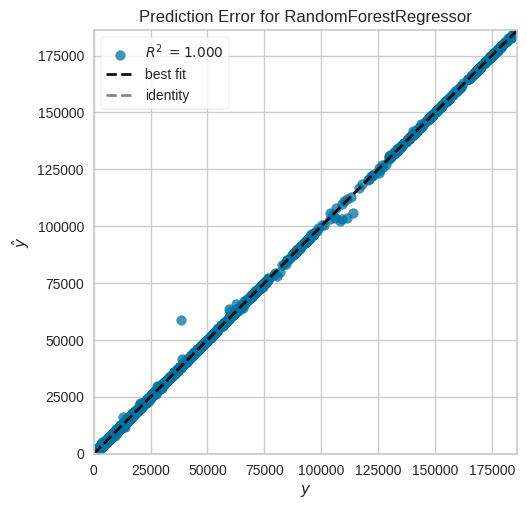

In [ ]:
# plot error
plot_model(best, plot = 'error')

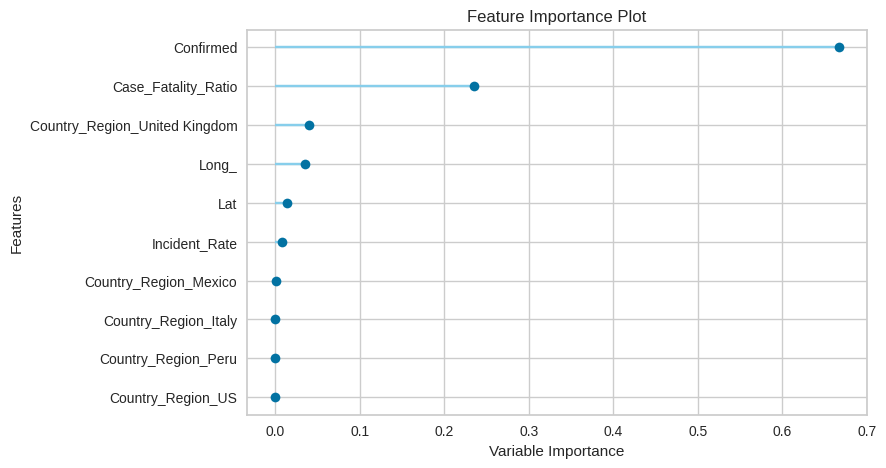

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.7362,1404.0336,37.4704,1.0000,0.0133,0.0025


In [ ]:
holdout_pred.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Incident_Rate,Case_Fatality_Ratio,date,Deaths,prediction_label
929127,Texas,US,2021-01-02 05:22:33,33.997803,-94.242500,2992,17592.755859,0.835562,01-01-2021,25,24.99
1816352,Texas,US,2021-01-02 05:22:33,47.107784,-94.916901,1604,7463.589355,2.493766,01-01-2021,40,39.82
614263,Texas,US,2021-01-02 05:22:33,42.470921,-91.835098,1921,9072.018555,1.717855,01-01-2021,33,33.05
1864034,Texas,Sweden,2021-01-02 05:22:33,66.830902,20.399200,50755,20294.451172,0.904344,01-01-2021,459,459.00
1118344,Texas,US,2021-01-02 05:22:33,35.580959,-92.513000,4335,26201.269531,1.522491,01-01-2021,66,66.00


## Predecir con datos de test (no usados en entrenamiento)

In [ ]:
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.8256,2892.3781,53.7808,0.9999,0.0123,0.0025


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Incident_Rate,Case_Fatality_Ratio,date,Deaths,prediction_label
0,Texas,US,2021-01-02 05:22:33,41.123512,-83.127800,12750,23107.035156,1.788235,01-01-2021,230,230.00
1,Texas,US,2021-01-02 05:22:33,41.649384,-75.299599,10041,19549.853516,1.663181,01-01-2021,167,167.04
2,Texas,US,2021-01-02 05:22:33,35.780773,-83.522400,30297,30784.732422,1.325795,01-01-2021,406,403.30
3,Texas,US,2021-01-02 05:22:33,33.618866,-95.048401,543,4167.013184,5.389222,01-01-2021,27,27.70
4,Texas,US,2021-01-02 05:22:33,43.720997,-87.945801,15026,13027.570312,1.138027,01-01-2021,171,170.97


## Guardar modelo

In [ ]:
ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'regresion_deaths_Desarrollo='+str(MODO_DESARROLLO)
save_model(best, ruta_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                              'Incident_Rate',
                                              'Case_Fatality_Ratio'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Province_State', 'Country_Region',
                                              'Last_Update', 'date'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),...
                                                                         {'col': 'date',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': 01-01-2021    0
 01-01-2022    1
 NaN          -1
 dtype: int64}]))),
              

## Prueba de carga de modelo (para ver como funciona :D )

In [ ]:
loaded_best_pipeline = load_model(ruta_modelo)
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                             'Incident_Rate',
                                             'Case_Fatality_Ratio'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Province_State', 'Country_Region',
                                             'Last_Update', 'date'],
                                    transformer=SimpleImputer(strategy='most_fr...
                                                                        {'col': 'date',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': 01-01-2021    0
01-01-2022    1
NaN          -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Country_Region', 'Last_Update'],
                                    transformer=OneHotEncoder(cols=['Country_Region',
                                                                    'Last_Update'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

In [ ]:
predictions = predict_model(loaded_best_pipeline, data = df_test)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.8256,2892.3781,53.7808,0.9999,0.0123,0.0025


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Incident_Rate,Case_Fatality_Ratio,date,Deaths,prediction_label
0,Texas,US,2021-01-02 05:22:33,41.123512,-83.127800,12750,23107.035156,1.788235,01-01-2021,230,230.00
1,Texas,US,2021-01-02 05:22:33,41.649384,-75.299599,10041,19549.853516,1.663181,01-01-2021,167,167.04
2,Texas,US,2021-01-02 05:22:33,35.780773,-83.522400,30297,30784.732422,1.325795,01-01-2021,406,403.30
3,Texas,US,2021-01-02 05:22:33,33.618866,-95.048401,543,4167.013184,5.389222,01-01-2021,27,27.70
4,Texas,US,2021-01-02 05:22:33,43.720997,-87.945801,15026,13027.570312,1.138027,01-01-2021,171,170.97
